## Prevendo Alocação de Alunos com Naive Bayes
### Ciência de Dados - 2025.01 - 3º período
### Aluno: Lucca de Sena Barbosa

- Importando as bibliotecas para a criação do modelo

In [49]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, roc_curve, classification_report



- Importando uma base de dados com o auxílio da biblioteca pandas.

In [51]:
df = pd.read_csv("Aula02/Dominio-Alunos-Alocados/data/placementdata.csv")
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,1
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,0
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,1
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,0
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,1
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,0
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,0
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,0


- Dividindo a base de dados entre atributos previsores(x) e classe(y).

Obs: Não foi incluído a primeira coluna, pois se trata do ID do estudante e não traz informações relevantes para o algoritmo.

In [52]:
x_features = df.iloc[:, 1:11].values
y_class = df.iloc[:, 11].values

x_features, y_class

(array([[7.5, 1, 1, ..., 'No', 61, 79],
        [8.9, 0, 3, ..., 'Yes', 78, 82],
        [7.3, 1, 2, ..., 'No', 79, 80],
        ...,
        [8.4, 1, 3, ..., 'Yes', 79, 81],
        [8.9, 0, 3, ..., 'Yes', 71, 85],
        [8.4, 0, 1, ..., 'No', 62, 66]], shape=(10000, 10), dtype=object),
 array([1, 0, 1, ..., 0, 0, 1], shape=(10000,)))

- Foram codificados os atributos previsores pelo método LabelEncoder e logo após padronizados com o método StandardScale.

In [53]:
codificador = LabelEncoder()

for i in range(x_features.shape[1]):
    x_features[:, i] = codificador.fit_transform(x_features[:, i])

x_features, y_class

(array([[10, 1, 1, ..., 0, 6, 22],
        [24, 0, 3, ..., 1, 23, 25],
        [8, 1, 2, ..., 0, 24, 23],
        ...,
        [19, 1, 3, ..., 1, 24, 24],
        [24, 0, 3, ..., 1, 16, 28],
        [19, 0, 1, ..., 0, 7, 9]], shape=(10000, 10), dtype=object),
 array([1, 0, 1, ..., 0, 0, 1], shape=(10000,)))

In [54]:
padronizador = StandardScaler()

x_features = padronizador.fit_transform(x_features)

x_features

array([[-0.30934266, -0.07388859, -1.18282217, ..., -1.65183558,
        -0.78230576,  0.50436813],
       [ 1.87781819, -1.57568915,  1.12152649, ...,  0.60538713,
         0.84761775,  0.84072567],
       [-0.62179421, -0.07388859, -0.03064784, ..., -1.65183558,
         0.94349561,  0.61648731],
       ...,
       [ 1.09668932, -0.07388859,  1.12152649, ...,  0.60538713,
         0.94349561,  0.72860649],
       [ 1.87781819, -1.57568915,  1.12152649, ...,  0.60538713,
         0.17647278,  1.17708321],
       [ 1.09668932, -1.57568915, -1.18282217, ..., -1.65183558,
        -0.68642791, -0.95318121]], shape=(10000, 10))

- Os dados foram divididos entre treino e teste para avaliar o desempenho do algoritmo
    - Para teste, foram 20% dos dados.
    - Para treino, foram 80% dos dados.

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_class, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [66]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- Criação de uma função que traz métricas para avaliação do algoritmo

In [58]:
def performancemetrics(y_true, predict, class_name):

    # Imprime Matriz de Confusão:
    confusion_matrix_df = pd.DataFrame(
        confusion_matrix(y_true, predict),
        index=class_name,
        columns=class_name
    )

    plt.figure(figsize=(5,3))
    sn.set_theme(font_scale=0.9)
    sn.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)


    # Imprime a Acurácia:
    print(f"A acurácia geral do modelo em relação a todos os dados foi de aproximadamente {accuracy_score(y_true, predict) * 100:.2f}%.")
    for i, label in enumerate(class_name):
        print(f"O modelo identificou corretamente {confusion_matrix_df.values[i][i]} registros com o rótulo '{label}'.")


    # Imprime Gráfico da Curva ROC
    fpr, tpr, thresholds = roc_curve(y_true, predict)
    auc = roc_auc_score(y_true, predict)
    plt.figure(figsize=(5,3))

    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

    plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
    plt.title('Curva ROC', fontsize=14)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 80.30%.
O modelo identificou corretamente 665 registros com o rótulo '0'.
O modelo identificou corretamente 941 registros com o rótulo '1'.


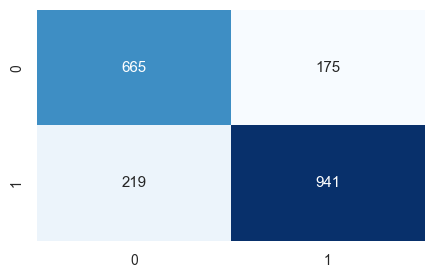

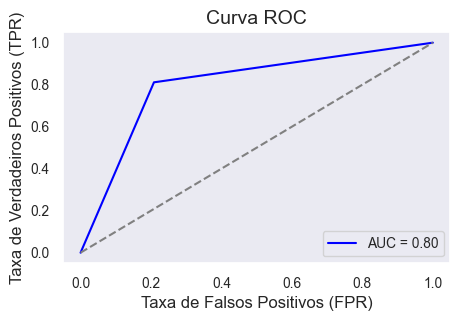

In [67]:
performancemetrics(y_test, y_pred, [0, 1])

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       840
           1       0.84      0.81      0.83      1160

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.80      0.80      2000

